In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

df = pd.read_csv("netflix_titles.csv.csv")




In [3]:
 # show Top 5 Rows of Dataset
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
# connection
conn = sqlite3.connect('netflix_db.sqlite')
cursor = conn.cursor()

In [5]:
df.to_sql('netflix_titles', conn, if_exists='replace', index=False)

8807

In [6]:
cursor.execute("DROP TABLE IF EXISTS netflix_titles")


In [7]:
cursor.execute("""
    CREATE TABLE netflix_titles (
        show_id TEXT PRIMARY KEY,
        type TEXT,
        title TEXT,
        director TEXT,
        cast TEXT,
        country TEXT,
        date_added DATE,
        release_year INTEGER,
        rating TEXT,
        duration TEXT,
        listed_in TEXT,
        description TEXT
    )
""")

In [8]:
df.to_sql("netflix_titles", conn, if_exists="append", index=False)


8807

In [9]:
result = pd.read_sql_query("SELECT * FROM netflix_titles LIMIT 5", conn)
print(result)

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water             None   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans             None   
4      s5  TV Show           Kota Factory             None   

                                                cast        country  \
0                                               None  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...           None   
3                                               None           None   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [10]:
schema = pd.read_sql_query("PRAGMA table_info(netflix_titles);", conn)
schema


,cid,name,type,notnull,dflt_value,pk
0,0,show_id,TEXT,0,None,1
1,1,type,TEXT,0,None,0
2,2,title,TEXT,0,None,0
3,3,director,TEXT,0,None,0
4,4,cast,TEXT,0,None,0
5,5,country,TEXT,0,None,0
6,6,date_added,DATE,0,None,0
7,7,release_year,INTEGER,0,None,0
8,8,rating,TEXT,0,None,0
9,9,duration,TEXT,0,None,0


In [11]:
total_records = pd.read_sql_query("SELECT COUNT(*) AS total_records FROM netflix_titles", conn)
total_records


,total_records
0,8807


In [10]:
null_counts = pd.read_sql_query("""
SELECT 
    SUM(CASE WHEN show_id IS NULL THEN 1 ELSE 0 END) AS null_show_id,
    SUM(CASE WHEN type IS NULL THEN 1 ELSE 0 END) AS null_type,
    SUM(CASE WHEN title IS NULL THEN 1 ELSE 0 END) AS null_title,
    SUM(CASE WHEN director IS NULL THEN 1 ELSE 0 END) AS null_director,
    SUM(CASE WHEN "cast" IS NULL THEN 1 ELSE 0 END) AS null_cast,
    SUM(CASE WHEN country IS NULL THEN 1 ELSE 0 END) AS null_country,
    SUM(CASE WHEN date_added IS NULL THEN 1 ELSE 0 END) AS null_date_added,
    SUM(CASE WHEN release_year IS NULL THEN 1 ELSE 0 END) AS null_release_year,
    SUM(CASE WHEN rating IS NULL THEN 1 ELSE 0 END) AS null_rating,
    SUM(CASE WHEN duration IS NULL THEN 1 ELSE 0 END) AS null_duration,
    SUM(CASE WHEN listed_in IS NULL THEN 1 ELSE 0 END) AS null_listed_in,
    SUM(CASE WHEN description IS NULL THEN 1 ELSE 0 END) AS null_description
FROM netflix_titles;
""", conn)

null_counts.T 


,0
null_show_id,0
null_type,0
null_title,0
null_director,2634
null_cast,825
null_country,831
null_date_added,10
null_release_year,0
null_rating,4
null_duration,3


In [12]:
distinct_types = pd.read_sql_query("SELECT DISTINCT type FROM netflix_titles", conn)
distinct_types


,type
0,Movie
1,TV Show


In [13]:
type_counts = pd.read_sql_query("SELECT type, COUNT(*) AS count FROM netflix_titles GROUP BY type", conn)
type_counts


,type,count
0,Movie,6131
1,TV Show,2676


In [14]:
ratings = pd.read_sql_query("SELECT DISTINCT rating FROM netflix_titles ORDER BY rating", conn)
ratings


,rating
0,None
1,66 min
2,74 min
3,84 min
4,G
5,NC-17
6,NR
7,PG
8,PG-13
9,R


In [15]:
durations = pd.read_sql_query("SELECT DISTINCT duration FROM netflix_titles ORDER BY duration", conn)
durations


,duration
0,None
1,1 Season
2,10 Seasons
3,10 min
4,100 min
...,...
216,95 min
217,96 min
218,97 min
219,98 min


In [16]:
year_range = pd.read_sql_query("SELECT MIN(release_year) AS min_year, MAX(release_year) AS max_year FROM netflix_titles", conn)
year_range


,min_year,max_year
0,1925,2021


In [17]:
top_countries = pd.read_sql_query("""
SELECT country, COUNT(*) AS count 
FROM netflix_titles 
WHERE country IS NOT NULL 
GROUP BY country 
ORDER BY count DESC 
LIMIT 5
""", conn)
top_countries


,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


In [17]:
#  Data Cleaning and Transformation (SQL + Python)


In [18]:
df.drop_duplicates(subset=['title', 'type', 'release_year'], inplace=True)

In [19]:
text_columns = ['title', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in', 'description']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip()

In [20]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [21]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [22]:
df['rating'] = df['rating'].str.upper()

In [23]:
rating_map = {
    'TV-MA': 'Adult',
    'TV-14': 'Teen',
    'R': 'Adult',
    'PG-13': 'Teen',
    'PG': 'Family',
    'G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-G': 'Family',
    'TV-PG': 'Family',
    'NR': 'Unrated',
    'UR': 'Unrated',
}
df['rating_category'] = df['rating'].map(rating_map).fillna('Other')

In [24]:
print("Cleaned DataFrame:", df.shape)

Cleaned DataFrame: (8807, 15)


In [25]:
# data validation

print("Rows in pandas DataFrame:", df.shape[0])

Rows in pandas DataFrame: 8807


In [26]:
print(df.describe(include='all').T)

                  count unique  \
show_id            8807   8807   
type               8807      2   
title              8807   8806   
director           8807   4529   
cast               8807   7693   
country            8807    749   
date_added         8709    NaN   
release_year     8807.0    NaN   
rating             8807     18   
duration           8807    221   
listed_in          8807    514   
description        8807   8775   
year_added       8709.0    NaN   
month_added      8709.0    NaN   
rating_category    8807      6   

                                                               top  freq  \
show_id                                                         s1     1   
type                                                         Movie  6131   
title                                                 Consequences     2   
director                                                       nan  2634   
cast                                                           nan   825   

In [27]:
print("Null values per column:\n", df.isnull().sum())

Null values per column:
 show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added         98
release_year        0
rating              0
duration            0
listed_in           0
description         0
year_added         98
month_added        98
rating_category     0
dtype: int64


In [28]:
df.to_csv("netflix_cleaned.csv", index=False)

In [29]:
print(" Exported cleaned dataset to 'netflix_cleaned.csv'")

 Exported cleaned dataset to 'netflix_cleaned.csv'


In [30]:
df.describe()

,date_added,release_year,year_added,month_added
count,8709,8807.000000,8709.000000,8709.000000
mean,2019-05-23 01:45:29.452290816,2014.180198,2018.887932,6.653347
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-20 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-12 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-26 00:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.819312,1.567961,3.431434


In [31]:
#Describe All Columns (Object + Date Included)df.info()
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8806,Consequences,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,8807,4529,nan,2634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,8807,7693,nan,825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8807,749,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8709,NaN,NaN,NaN,2019-05-23 01:45:29.452290816,2008-01-01 00:00:00,2018-04-20 00:00:00,2019-07-12 00:00:00,2020-08-26 00:00:00,2021-09-25 00:00:00,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,1925.0,2013.0,2017.0,2019.0,2021.0,8.819312
rating,8807,18,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8807,221,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Column Info (Data types and nulls)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         8807 non-null   object        
 4   cast             8807 non-null   object        
 5   country          8807 non-null   object        
 6   date_added       8709 non-null   datetime64[ns]
 7   release_year     8807 non-null   int64         
 8   rating           8807 non-null   object        
 9   duration         8807 non-null   object        
 10  listed_in        8807 non-null   object        
 11  description      8807 non-null   object        
 12  year_added       8709 non-null   float64       
 13  month_added      8709 non-null   float64       
 14  rating_category  8807 non-null   object 

In [33]:
#Missing Values Per Column
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added         98
release_year        0
rating              0
duration            0
listed_in           0
description         0
year_added         98
month_added        98
rating_category     0
dtype: int64

In [34]:
#Top 5 Most Common Ratings
df['rating'].value_counts().head()

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

In [35]:
#Content Type Distribution
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [37]:
df = pd.read_csv("netflix_titles.csv.csv")

In [42]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)

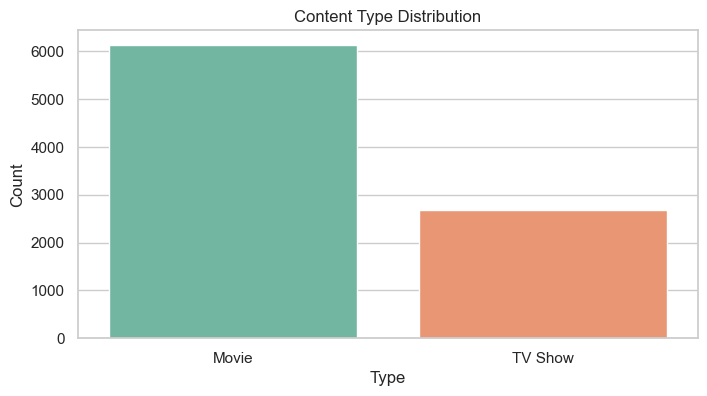

In [43]:
#Content Type Count (Movies vs TV Shows)top_ratings = df['rating'].value_counts().head(10)

sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='muted')
plt.title("Top 10 Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='type', palette='Set2')
plt.title("Content Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


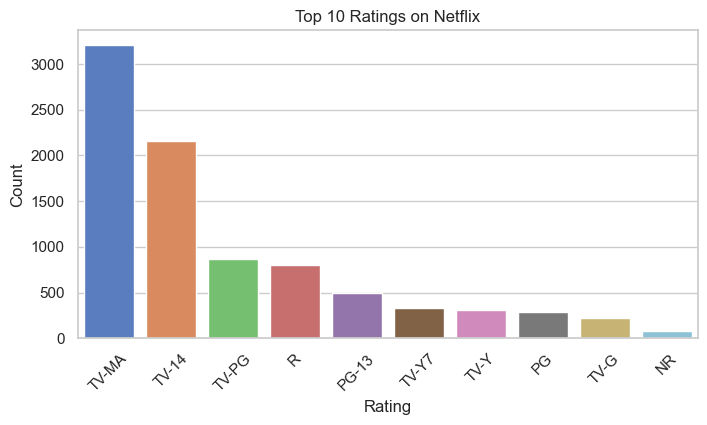

In [44]:
#Rating Distribution (Top 10 Ratings)
top_ratings = df['rating'].value_counts().head(10)

sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='muted')
plt.title("Top 10 Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


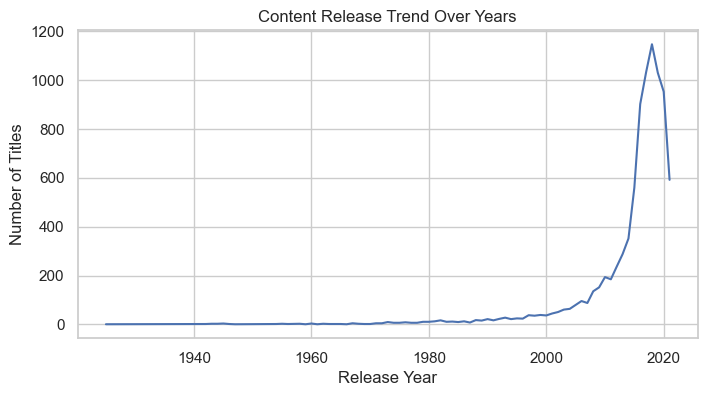

In [45]:
#Content by Release Year
year_counts = df['release_year'].value_counts().sort_index()

sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title("Content Release Trend Over Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


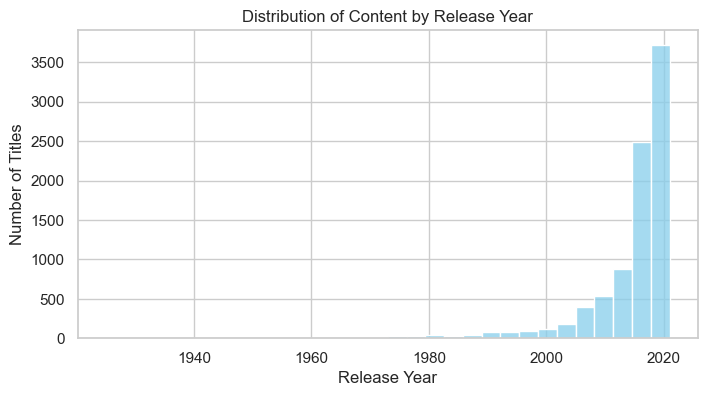

In [48]:
#Univariate Analysis

#release_year Histogram
sns.histplot(data=df, x='release_year', bins=30, kde=False, color='skyblue')
plt.title("Distribution of Content by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


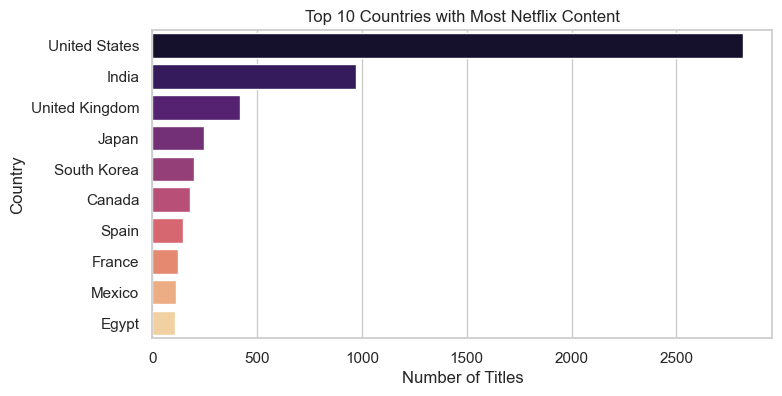

In [50]:
# Top 10 country by Content Count
top_countries = df['country'].value_counts().dropna().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


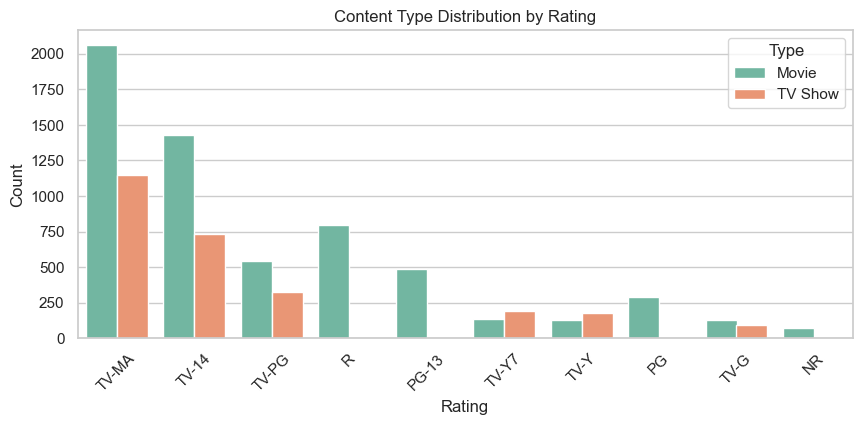

In [51]:
#Bivariate Analysis
# Count of Content by Type and Rating
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index[:10], palette='Set2')
plt.title("Content Type Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


In [52]:
content_by_year_type = df.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=content_by_year_type, x='year_added', y='count', hue='type', marker='o')
plt.title("Content Added Over Time by Type")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()


KeyError: 'year_added'

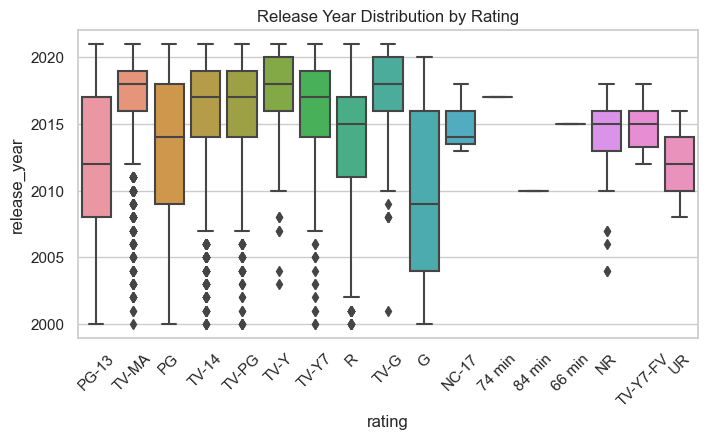

In [53]:
#Rating vs Release Year (Boxplot)
sns.boxplot(data=df[df['release_year'] >= 2000], x='rating', y='release_year')
plt.title("Release Year Distribution by Rating")
plt.xticks(rotation=45)
plt.show()


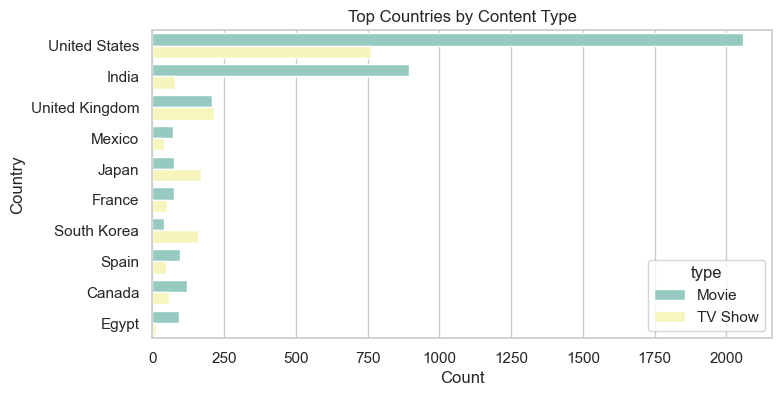

In [57]:
#Country vs Type (Top 10 Countries)
top_countries = df['country'].value_counts().dropna().head(10).index.tolist()
df_country = df[df['country'].isin(top_countries)]

sns.countplot(data=df_country, y='country', hue='type', palette='Set3')
plt.title("Top Countries by Content Type")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


In [60]:
#Box Plots for Outlier Detection
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [61]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [62]:
num_df = df[['release_year', 'year_added', 'month_added']].dropna()


In [65]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)

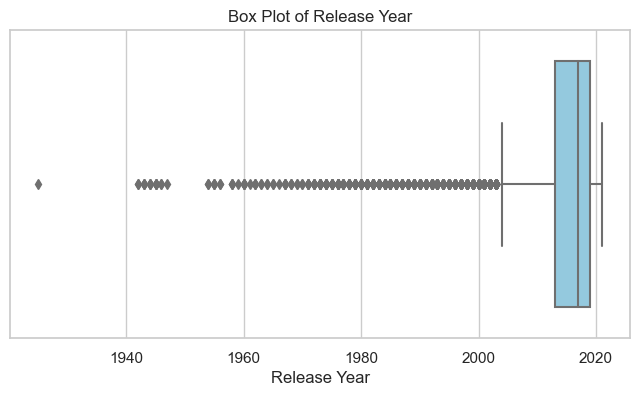

In [66]:
#Release Year
sns.boxplot(x=num_df['release_year'], color="skyblue")
plt.title("Box Plot of Release Year")
plt.xlabel("Release Year")
plt.show()


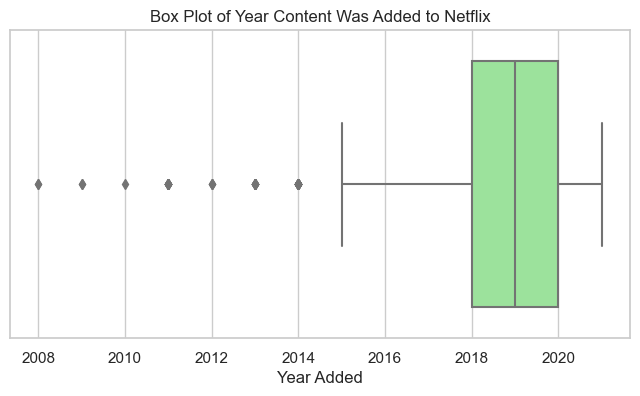

In [67]:
#Year Added
sns.boxplot(x=num_df['year_added'], color="lightgreen")
plt.title("Box Plot of Year Content Was Added to Netflix")
plt.xlabel("Year Added")
plt.show()


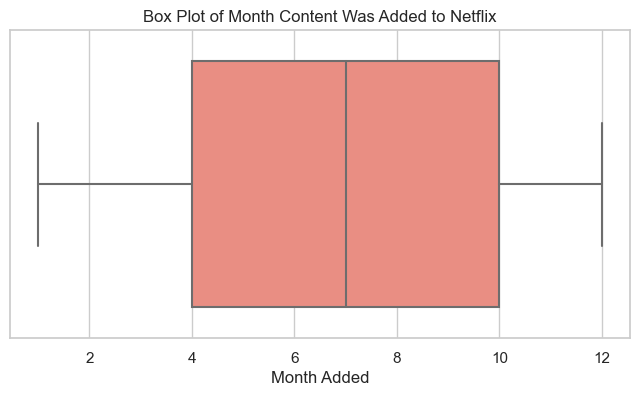

In [68]:
#Month added
sns.boxplot(x=num_df['month_added'], color="salmon")
plt.title("Box Plot of Month Content Was Added to Netflix")
plt.xlabel("Month Added")
plt.show()


In [77]:
#Check for Unusual Release Years
print("Min year:", df['release_year'].min())
print("Max year:", df['release_year'].max())


Min year: 1925
Max year: 2021


In [78]:
df_cleaned = df[(df['release_year'] >= 1950) & (df['release_year'] <= 2024)]
print("Removed outliers — New shape:", df_cleaned.shape)


Removed outliers — New shape: (8791, 15)


In [79]:
df['is_outlier_year'] = ~df['release_year'].between(1950, 2024)
df[['title', 'release_year', 'is_outlier_year']].head()


,title,release_year,is_outlier_year
0,Dick Johnson Is Dead,2020,False
1,Blood & Water,2021,False
2,Ganglands,2021,False
3,Jailbirds New Orleans,2021,False
4,Kota Factory,2021,False


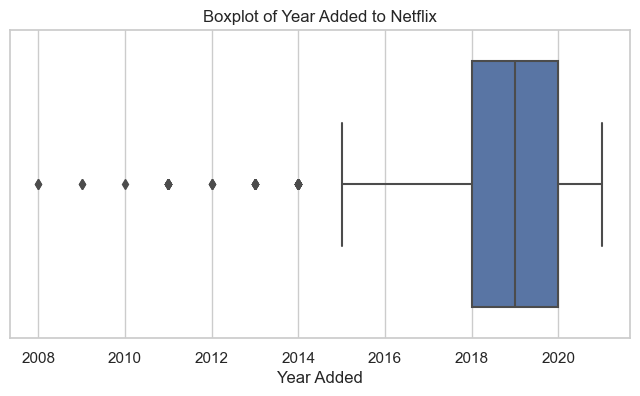

In [80]:
#Boxplot for year_added (based on date_added)
sns.boxplot(x=df['year_added'].dropna())
plt.title("Boxplot of Year Added to Netflix")
plt.xlabel("Year Added")
plt.show()
